<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Andre Gonzalez, Emiliano Rodriguez

**Fecha:** 07 de Marzo del 2023.

**Expediente** : 739922, 738288
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Andr3Glez/Proyecto_conjunto3_CERodriguez_ANGonzalez-?query=Andr3Glez

# Tarea 4: Clase 11

# <font color='red'> Tarea: </font>

Terminar los demás numerales faltantes de este ejercicio.
El objetivo para es este dataset es el siguiente:
1. Construir una red neuronal MLP univariada. Para esto, escoger la variable que más tenga correlación con la variable de salida.
2. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.
3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

**Nota**: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de pearson y la otra usando pruebas estadísiticas con las siguientes paqueterías
```
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
```
> Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

Código de solución estudiante 1 Andre Gonzalez

In [2]:
# Código de solución estudiante 1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [3]:
#Primer codigo trabajado en clase
# Cargar los datos de entrenamiento y prueba
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

# Tamaños de los conjuntos de datos
print('Train:')
print(f'\t- Train Shape: {X_train.shape}')
print(f'\t- Etiquetas Train Shape: {y_train.shape}\n')

print('Test:')
print(f'\t- Test Shape: {X_test.shape}')
print(f'\t- Etiquetas Test Shape: {y_test.shape}')

Train:
	- Train Shape: (404, 13)
	- Etiquetas Train Shape: (404,)

Test:
	- Test Shape: (102, 13)
	- Etiquetas Test Shape: (102,)


In [4]:
# Obviar la columna -2 por que considera una variable de poco interés
np.delete(train_data, -2, axis=1)[0:3,-4:]

array([[  4.  , 307.  ,  21.  ,  18.72],
       [  2.  , 348.  ,  14.7 ,   3.11],
       [ 24.  , 666.  ,  20.2 ,   3.26]])

In [5]:
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

train_data.shape, test_data.shape

((404, 12), (102, 12))

In [6]:
train_labels.shape, test_labels.shape

((404,), (102,))

In [7]:
np.hstack([train_labels, test_labels]).shape

(506,)

In [8]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,9.71,26.7


In [9]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    
    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [12]:
# Realizar un scatterplot entre la variables seleccionadas sn.scatterplot -> data, x, y
features_cols = ['RM']
output_col = ['MEDV']

In [13]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

(466, 2)
(452, 2)


In [14]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

In [15]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [16]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 3ms/step - loss: 29.1481 - mae: 4.1654
Error cuadrático medio en el conjunto de prueba: 29.14810562133789
Error absoluto medio en el conjunto de prueba: 4.165366172790527


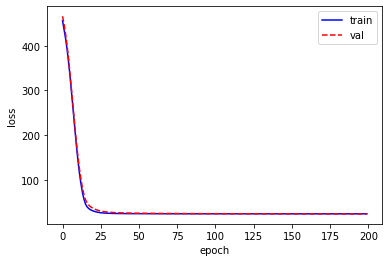

In [18]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

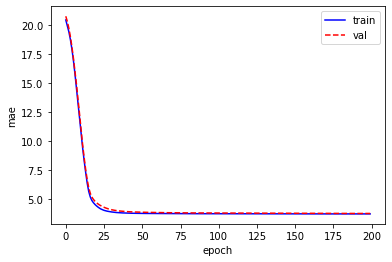

In [19]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

2/2 [==============================] - 0s 2ms/step


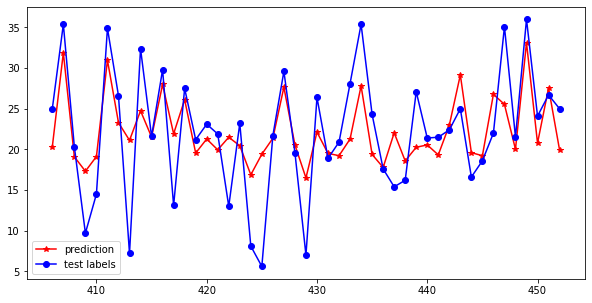

In [20]:
predicted = model.predict(test_data)
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()

Parte 2

In [33]:
# Realizar un scatterplot entre la variables seleccionadas sn.scatterplot -> data, x, y
output_col = ['MEDV']
features_cols = [col for col in data.columns if col != output_col[0]]

# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = 0.2
TRAIN_SIZE = int((1 - TEST_SIZE) * X_out.shape[0])

train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

(466, 13)
(404, 13)
Forma de train_data: (323, 12)
Forma de test_data: (81, 12)
Forma de train_labels: (323, 1)
Forma de test_labels: (81, 1)


In [28]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [29]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 [==============================] - 0s 2ms/step - loss: 12.1063 - mae: 2.2550
Error cuadrático medio en el conjunto de prueba: 12.106348991394043
Error absoluto medio en el conjunto de prueba: 2.254964828491211


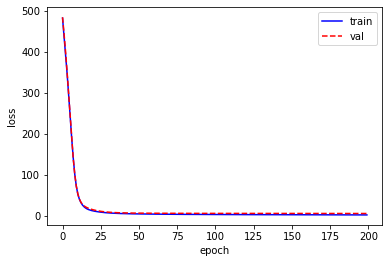

In [31]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

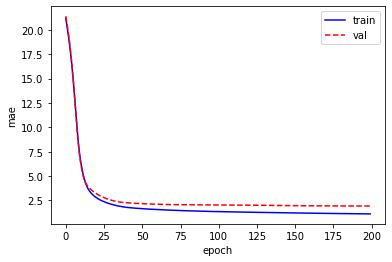

In [32]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

Parte 3

In [44]:
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

In [45]:
# Obviar la columna -2 por que considera una variable de poco interés
train_data[0:3,-4:]
np.delete(train_data, -2, axis=1)[0:3,-4:]

array([[ 0.538,  6.142, 91.7  , 18.72 ],
       [ 0.515,  6.037, 34.5  ,  8.01 ],
       [ 0.713,  6.376, 88.4  , 14.65 ]])

In [46]:
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

train_data.shape, test_data.shape

((323, 8), (81, 8))

<AxesSubplot:>

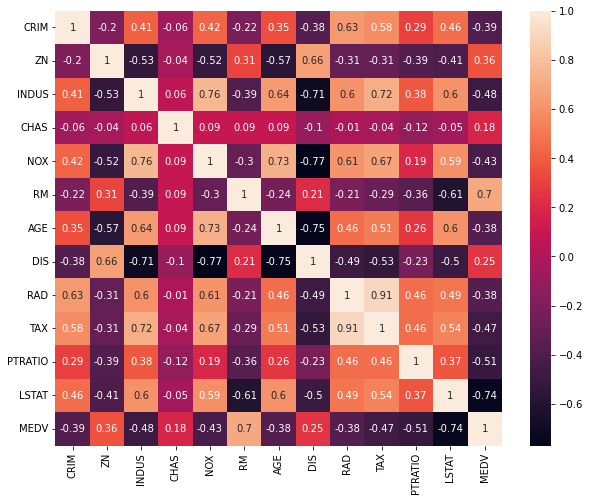

In [49]:
# Análisis de correlación (selección de features)
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

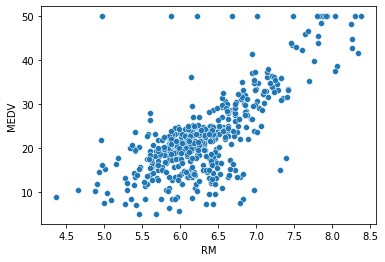

In [63]:
import seaborn as sns
from sklearn.model_selection import train_test_split

# Columnas de salida y características seleccionadas
output_col = 'MEDV'
features_cols = ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# Remover outliers
data_cleaned = data[~data[features_cols].apply(lambda x: (x - x.mean()).abs() > 3 * x.std()).any(axis=1)]

# Dividir los datos en características (X) y salida (y)
X = data_cleaned[features_cols]
y = data_cleaned[output_col]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar scatterplot
sns.scatterplot(data=data_cleaned, x='RM', y='MEDV')

In [64]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [65]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 [==============================] - 0s 2ms/step - loss: 14.4195 - mae: 2.7108
Error cuadrático medio en el conjunto de prueba: 14.419519424438477
Error absoluto medio en el conjunto de prueba: 2.7107906341552734


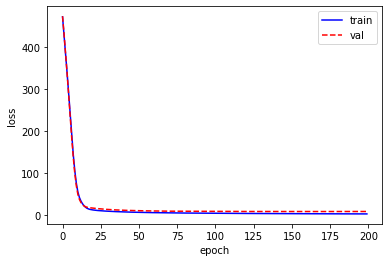

In [67]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

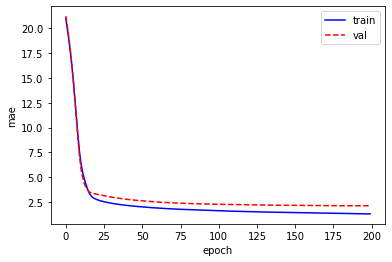

In [68]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización EarlyStoppin y dropout. Investigar como se pueden implementar estas estrategias en tensorflow.

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [70]:
# Definir la arquitectura de la red neuronal con regularización Dropout
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

In [71]:

# Configurar EarlyStopping como callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10) 
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0,
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 [==============================] - 0s 2ms/step - loss: 21.8772 - mae: 3.4411
Error cuadrático medio en el conjunto de prueba: 21.877180099487305
Error absoluto medio en el conjunto de prueba: 3.4411373138427734


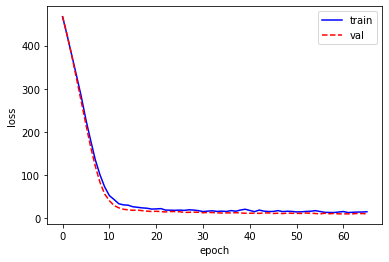

In [72]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

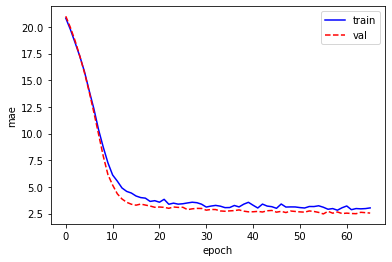

In [73]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

Código de solución estudiante 2: Emiliano Rodríguez

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 4s 64us/step


1. Construir una red neuronal MLP univariada. Para esto, escoger la variable que más tenga correlación con la variable de salida.

In [3]:
# Obviar la columna -2 por que considera una variable de poco interés
np.delete(train_data, -2, axis=1)[0:3,-4:]

array([[  4.  , 307.  ,  21.  ,  18.72],
       [  2.  , 348.  ,  14.7 ,   3.11],
       [ 24.  , 666.  ,  20.2 ,   3.26]])

In [4]:
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

train_data_og = train_data.copy()
test_data_og = test_data.copy()
train_labels_og = train_labels.copy()
test_labels_og = test_labels.copy()

np.hstack([train_labels, test_labels]).shape

(506,)

In [5]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data_og = data.copy()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7


In [6]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

# Realizar un scatterplot entre la variables seleccionadas sn.scatterplot -> data, x, y
features_cols = ['RM']
output_col = ['MEDV']

# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values


(466, 2)
(452, 2)


In [7]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [8]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 8ms/step - loss: 29.2421 - mae: 4.1735
Error cuadrático medio en el conjunto de prueba: 29.242136001586914
Error absoluto medio en el conjunto de prueba: 4.173451900482178


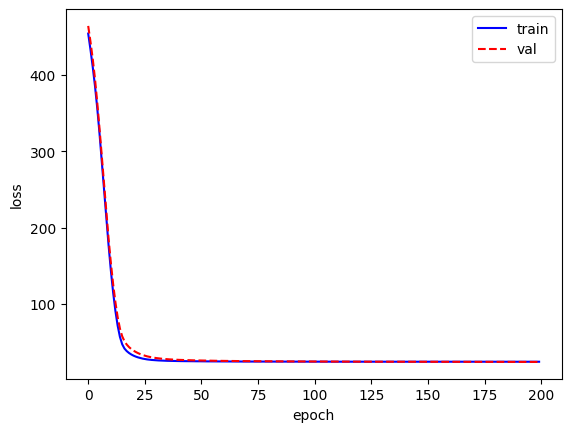

In [10]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

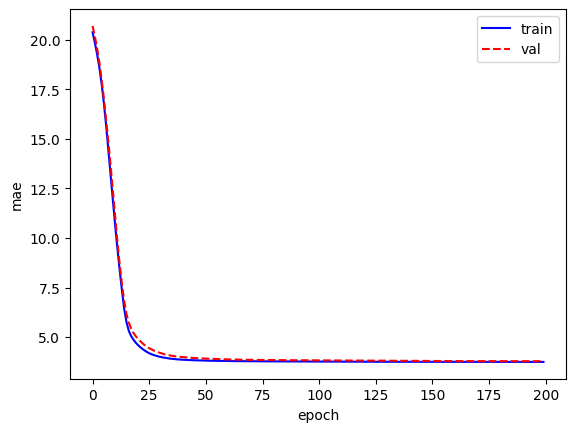

In [11]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

2/2 [==============================] - 0s 7ms/step


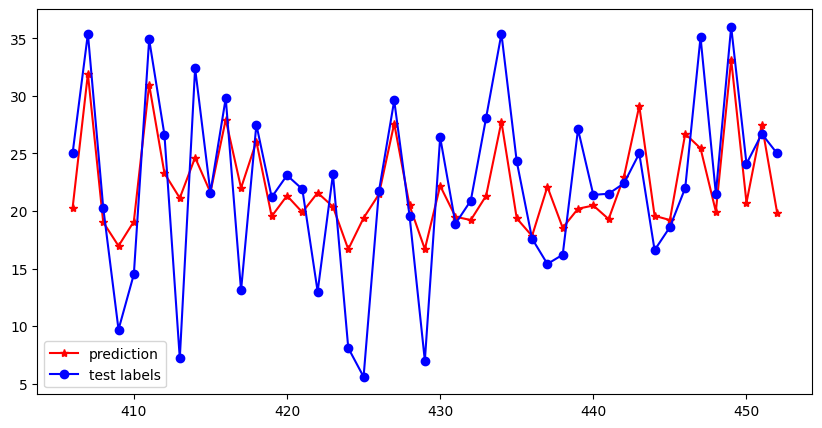

In [12]:
predicted = model.predict(test_data)

plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()

2. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.

In [13]:
train_data = train_data_og.copy()
test_data = test_data_og.copy()
train_labels = train_labels_og.copy()
test_labels = test_labels_og.copy()

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = data_og.copy()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7


In [14]:
# Realizar un scatterplot entre la variables seleccionadas sn.scatterplot -> data, x, y
output_col = ['MEDV']
features_cols = [col for col in data.columns if col != output_col[0]]

# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values


(466, 13)
(404, 13)


In [15]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = 0.2
TRAIN_SIZE = int((1 - TEST_SIZE) * X_out.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("Forma de train_data:", train_data.shape)
print("Forma de test_data:", test_data.shape)
print("Forma de train_labels:", train_labels.shape)
print("Forma de test_labels:", test_labels.shape)


Forma de train_data: (323, 12)
Forma de test_data: (81, 12)
Forma de train_labels: (323, 1)
Forma de test_labels: (81, 1)


In [16]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [17]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 [==============================] - 0s 5ms/step - loss: 9.9044 - mae: 2.2869
Error cuadrático medio en el conjunto de prueba: 9.904380798339844
Error absoluto medio en el conjunto de prueba: 2.2869322299957275


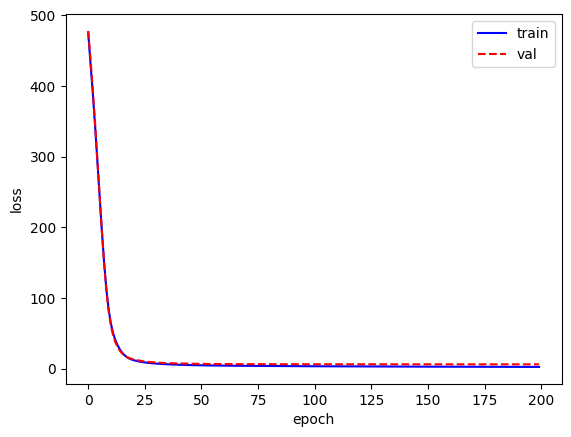

In [19]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

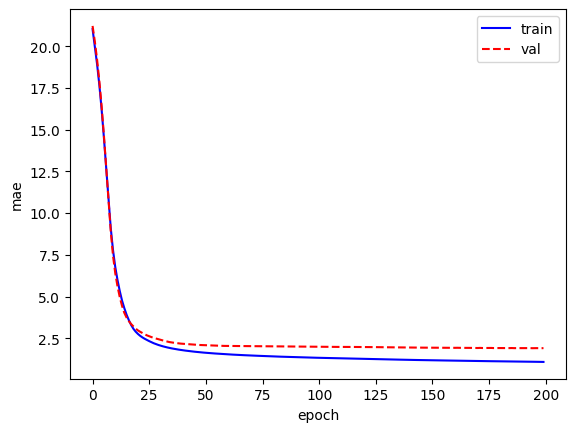

In [20]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

In [21]:
from sklearn.feature_selection import SelectKBest

train_data = train_data_og.copy()
test_data = test_data_og.copy()
train_labels = train_labels_og.copy()
test_labels = test_labels_og.copy()

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = data_og.copy()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7


In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

# Definir las características (X) y la variable objetivo (y)
X = data.drop(columns=['MEDV'])  # Todas las columnas excepto 'MEDV'
y = data['MEDV']

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k=5)  # Seleccionar las 5 mejores características
selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]

# Imprimir las mejores características seleccionadas
print("Las mejores características seleccionadas son:", selected_features)


Las mejores características seleccionadas son: Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


In [23]:
# Realizar un scatterplot entre la variables seleccionadas sn.scatterplot -> data, x, y
output_col = ['MEDV']
features_cols = ['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = 0.2
TRAIN_SIZE = int((1 - TEST_SIZE) * X_out.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]


(466, 6)
(466, 6)


In [24]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                384       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 [==============================] - 0s 6ms/step - loss: 13.0990 - mae: 2.6942
Error cuadrático medio en el conjunto de prueba: 13.098970413208008
Error absoluto medio en el conjunto de prueba: 2.6941959857940674


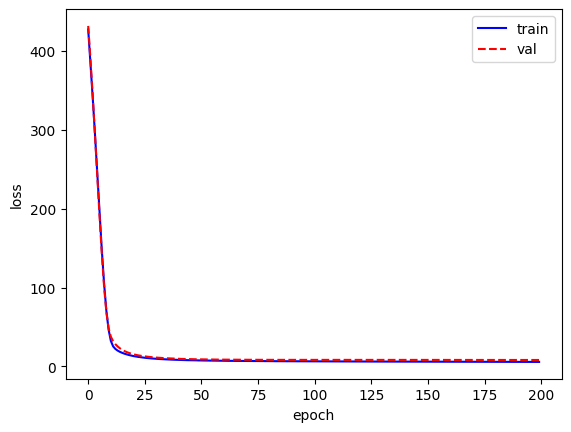

In [26]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

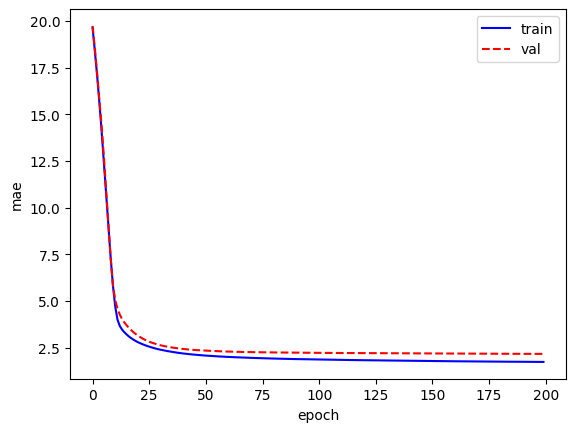

In [27]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

> Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

In [28]:
train_data = train_data_og.copy()
test_data = test_data_og.copy()
train_labels = train_labels_og.copy()
test_labels = test_labels_og.copy()

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = data_og.copy()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7


In [29]:
# Realizar un scatterplot entre la variables seleccionadas sn.scatterplot -> data, x, y
output_col = ['MEDV']
features_cols = ['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = 0.2
TRAIN_SIZE = int((1 - TEST_SIZE) * X_out.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("Forma de train_data:", train_data.shape)
print("Forma de test_data:", test_data.shape)
print("Forma de train_labels:", train_labels.shape)
print("Forma de test_labels:", test_labels.shape)


(466, 6)
(466, 6)
Forma de train_data: (372, 5)
Forma de test_data: (94, 5)
Forma de train_labels: (372, 1)
Forma de test_labels: (94, 1)


In [30]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal con regularización Dropout
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dropout(0.2),  # Agregar capa Dropout
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),  # Agregar capa Dropout
    keras.layers.Dense(1)
])

# Configurar EarlyStopping como callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Detener el entrenamiento si la pérdida en el conjunto de validación no mejora después de 10 épocas

# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo con EarlyStopping
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0,
    callbacks=[early_stopping]  # Pasar el callback EarlyStopping al argumento 'callbacks'
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 [==============================] - 0s 4ms/step - loss: 14.2966 - mae: 2.8756
Error cuadrático medio en el conjunto de prueba: 14.29663372039795
Error absoluto medio en el conjunto de prueba: 2.8756399154663086


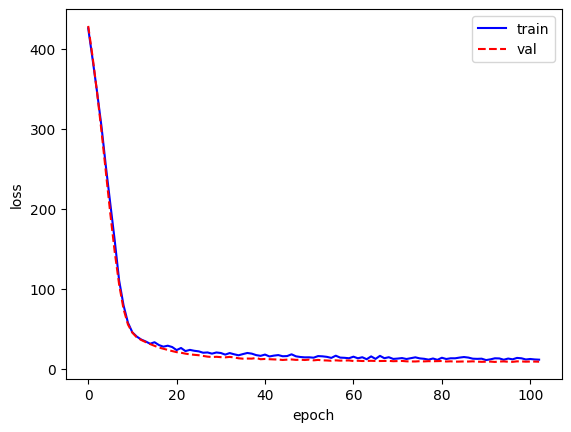

In [31]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

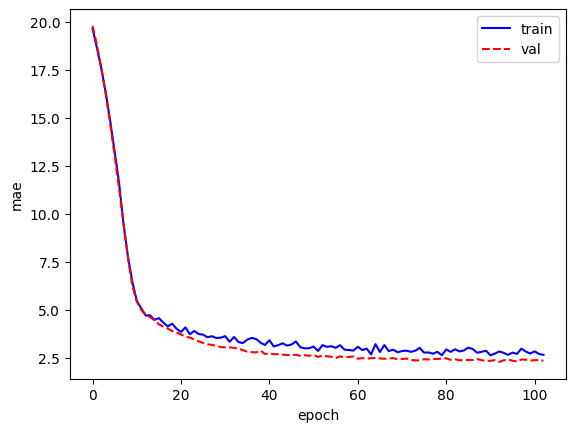

In [32]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()